In [80]:
import shapefile
# import shapely

from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
from matplotlib import path
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [9]:
# from pycmbs.region import RegionBboxLatLon
# from pycmbs.plots import GlobalMeanPlot
# from pycmbs.examples import download
# from pycmbs.data import Data
# from pycmbs.mapping import map_plot
# from pycmbs.diagnostic import PatternCorrelation
# from pycmbs.region import RegionShape

In [137]:
shp_dir = "/Users/TommyLees/Desktop/chirps_data/awash_analysis/awash_shp/Export_Output.shp"
sf = shapefile.Reader(shp_dir)

In [138]:
pwd

'/Users/TommyLees/Desktop/chirps_data/awash_analysis'

In [23]:
sf.fields

[('DeletionFlag', 'C', 1, 0),
 ['OID_', 'N', 10, 0],
 ['Name', 'C', 254, 0],
 ['FolderPath', 'C', 254, 0],
 ['SymbolID', 'N', 10, 0],
 ['AltMode', 'N', 5, 0],
 ['Base', 'F', 19, 11],
 ['Clamped', 'N', 5, 0],
 ['Extruded', 'N', 5, 0],
 ['Snippet', 'C', 254, 0],
 ['PopupInfo', 'C', 254, 0],
 ['Shape_Leng', 'F', 19, 11],
 ['Shape_Area', 'F', 19, 11]]

## Shape Type

- NULL = 0
- POINT = 1
- POLYLINE = 3
- POLYGON = 5
- MULTIPOINT = 8
- POINTZ = 11
- POLYLINEZ = 13
- POLYGONZ = 15
- MULTIPOINTZ = 18
- POINTM = 21
- POLYLINEM = 23
- POLYGONM = 25
- MULTIPOINTM = 28
- MULTIPATCH = 31

In [22]:
sf.shapeType # POLYGONZ

15

In [29]:
sf.shapeType == shapefile.POLYGONZ

True

## PolygonZ
https://www.esri.com/library/whitepapers/pdfs/shapefile.pdf

A PolygonZ consists of a number of rings. A ring is a closed, non-self-intersecting loop.
A PolygonZ may contain multiple outer rings. The rings of a PolygonZ are referred to as
its parts

The fields for a PolygonZ are:
- __Box__ The Bounding Box for the PolygonZ stored in the order Xmin, Ymin, Xmax, Ymax.
- __NumParts__ The number of rings in the PolygonZ.
- __NumPoints__ The total number of points for all rings.
- __Parts__ An array of length NumParts. Stores, for each ring, the index of its first point in the points array. Array indexes are with respect to 0.
- __Points__ An array of length NumPoints. The points for each ring in the PolygonZ are stored end to end. The points for Ring 2 follow the points for Ring 1, and so on. The parts array holds the array index of the starting point for each ring. There is no delimiter in the points array between rings.
- __Z Range__  The minimum and maximum Z values for the arc stored in the order Zmin, Zmax.
- __Z Array__ An array of length NumPoints. The Z values for each ring in the PolygonZ are stored end to end. The Z values for Ring 2 follow the Z values for Ring 1, and so on. The parts array holds the array index of the starting Z value for each ring. There is no delimiter in the Z value array between rings.
- __M Range__  The minimum and maximum measures for the PolygonZ stored in the order Mmin, Mmax.
- __M Array__  An array of length NumPoints. The measures for each ring in the PolygonZ are stored end to end. The measures for Ring 2 follow the measures for Ring 1, and so on. The parts array holds the array index of the starting measure for each ring. There is no delimiter in the measure array between rings.

In [139]:
# bounding box [latMIN,    longMIN,    latMAX,    longMAX   ]
#              [llcrnrlat, llcrnrlong, urcrnrlat, urcrnrlong]
sf.bbox

[37.955421830000034, 7.897642700000063, 43.27428384000004, 12.231139660000064]

In [149]:
# so what values do we need for the cdo sellatlonbox,?
print(np.array(sf.bbox)[0] - 3)
print(np.array(sf.bbox)[1] - 3)
print(np.array(sf.bbox)[2] + 3)
print(np.array(sf.bbox)[3] + 3 )

34.955421830000034
4.897642700000063
46.27428384000004
15.231139660000064


In [30]:
shapes = sf.shapes()

In [53]:
# what attributes?
for name in dir(shapes[0]):
    if not name.startswith('__'):
        print(name)

bbox
m
parts
points
shapeType
z


### `.bbox`
If the shape type contains multiple points this tuple describes the lower left (x,y) coordinate and upper right corner coordinate creating a complete box around the points

### `.parts`
Parts simply group collections of points into shapes. If the shape record has multiple parts this attribute contains the index of the first point of each part. If there is only one part then a list containing 0 is returned

### `.points`
points attribute contains a list of tuples containing an (x,y) coordinate for each point in the shape

In [77]:
shape = shapes[0]
shape.bbox

[37.955421830000034, 7.897642700000063, 43.27428384000004, 12.231139660000064]

In [79]:
# [(lat,long), (lat,long), ...]
shape.points

[(41.789395110000044, 11.553992250000022),
 (41.78821246000007, 11.549648800000057),
 (41.783293170000036, 11.542405960000053),
 (41.781673890000036, 11.531814970000028),
 (41.77949839000007, 11.520093920000022),
 (41.77704548000003, 11.51094493000005),
 (41.77370688000008, 11.504134780000072),
 (41.77083189000007, 11.496829710000043),
 (41.768798470000036, 11.491662680000047),
 (41.771651570000074, 11.479833820000067),
 (41.77474392000005, 11.467703910000068),
 (41.778176200000075, 11.453180580000037),
 (41.78124643000007, 11.440244260000043),
 (41.78074436000003, 11.440249030000075),
 (41.78069674000005, 11.435371200000077),
 (41.77987263000006, 11.435379030000036),
 (41.77985677000004, 11.43375308000003),
 (41.780680870000026, 11.433745250000072),
 (41.78067293000004, 11.432932280000045),
 (41.78232112000006, 11.432916620000071),
 (41.782313180000074, 11.432103650000045),
 (41.783152760000064, 11.432095670000024),
 (41.78463203000007, 11.425751280000043),
 (41.78782854000008, 11.411

# Records
record in a shapefile contains the attributes for each shape

records stored in `.dbf` file

call the `fields` attribute of the shapefile as a Python list

- __Field name__: the name describing the data at this column index.
- __Field type__: the type of data at this column index. Types can be: Character, Numbers, Longs, Dates, or Memo. The "Memo" type has no meaning within a GIS and is part of the xbase spec instead.
- __Field length__: the length of the data found at this column index. Older GIS software may truncate this length to 8 or 11 characters for "Character" fields.
- __Decimal length__: the number of decimal places found in "Number" fields.

`.fields` (ATTRIBUTES) match `.records` (GEOMETRY)

#### note: should definitely  be a dictionary but the package is shit

In [66]:
fields = sf.fields
fields

[('DeletionFlag', 'C', 1, 0),
 ['OID_', 'N', 10, 0],
 ['Name', 'C', 254, 0],
 ['FolderPath', 'C', 254, 0],
 ['SymbolID', 'N', 10, 0],
 ['AltMode', 'N', 5, 0],
 ['Base', 'F', 19, 11],
 ['Clamped', 'N', 5, 0],
 ['Extruded', 'N', 5, 0],
 ['Snippet', 'C', 254, 0],
 ['PopupInfo', 'C', 254, 0],
 ['Shape_Leng', 'F', 19, 11],
 ['Shape_Area', 'F', 19, 11]]

In [64]:
# NOTE: excluding the DeletionFlag
records = sf.records()
records

[[0,
  'Awash_Basin',
  'Awash_Basin.kml',
  0,
  0,
  0.0,
  -1,
  0,
  '',
  '',
  30.1809437278,
  9.41126282751]]

In [74]:
shape_records = sf.shapeRecords()
# for shape 1 get the OID_
shape_records[0].record[1]

'Awash_Basin'

# PLOT THE DATA

In [133]:
sf = shapefile.Reader("awash_shp/Export_Output.shp")
bbox = sf.bbox
poly_points = shape.points

In [134]:
# the KEY exercise
poly_path = path.Path(poly_points)

In [135]:
xmin = bbox[0]
ymin = bbox[1]
xmax = bbox[2]
ymax = bbox[3]

# make 2D array of points from xmin-xmax // ymin-ymax
x = np.linspace(xmin,xmax,50)
y = np.linspace(ymin,ymax,50)
xx,yy = np.meshgrid(x,y)
xx,yy = xx.flatten(), yy.flatten()

flags = poly_path.contains_points(np.vstack((xx, yy)).T)

(7.897642700000063, 12.231139660000064)

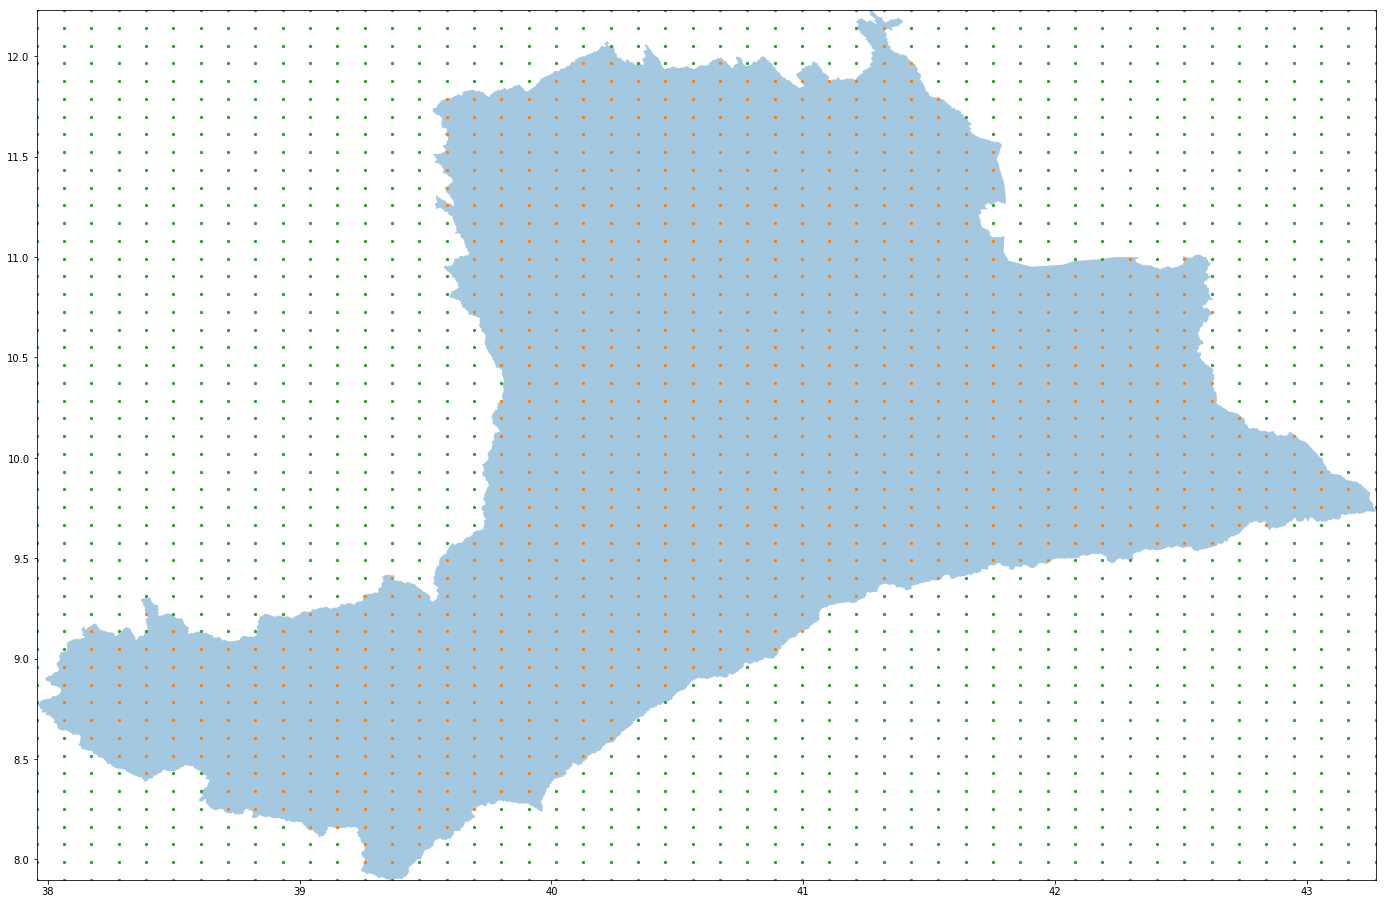

In [136]:
figsize(12*2,8*2)
fig,ax = plt.subplots(1,1)

# plot the polygon
p = PatchCollection([Polygon(poly_points)], alpha=0.4)
ax.add_collection(p)

# plot grid points
ax.scatter(xx[flags],yy[flags],5,color="C1") # points INside 
ax.scatter(xx[~flags],yy[~flags],5,color="C2") # points OUTside

# set the bounding box
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

In [122]:
# yy[flags].mean()
?PatchCollection